In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('tree.csv')
df

,Days,Outlook,Temperature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


In [5]:
df = df.drop('Days', axis=1)
df.head()

,Outlook,Temperature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Outlook       8 non-null      object
 1   Temperature   8 non-null      object
 2   Routine       8 non-null      object
 3   Wear Jacket?  8 non-null      object
dtypes: object(4)
memory usage: 384.0+ bytes


In [7]:
y = df['Wear Jacket?']
y

0     No
1    Yes
2     No
3    Yes
4    Yes
5     No
6     No
7     No
Name: Wear Jacket?, dtype: object

In [8]:
x = df.drop('Wear Jacket?', axis=1)
x

,Outlook,Temperature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor
5,Sunny,Warm,Outdoor
6,Cloudy,Warm,Indoor
7,Sunny,Warm,Indoor


# Preprocessing

In [9]:
#Enconding
from sklearn.preprocessing import LabelEncoder

In [10]:
lb = LabelEncoder()

In [11]:
x.Outlook = lb.fit_transform(df['Outlook'])
x

,Outlook,Temperature,Routine
0,1,Cold,Indoor
1,0,Cold,Indoor
2,0,Warm,Outdoor
3,1,Cold,Outdoor
4,0,Cold,Outdoor
5,1,Warm,Outdoor
6,0,Warm,Indoor
7,1,Warm,Indoor


In [12]:
x.Temperature = lb.fit_transform(df['Temperature'])
x

,Outlook,Temperature,Routine
0,1,0,Indoor
1,0,0,Indoor
2,0,1,Outdoor
3,1,0,Outdoor
4,0,0,Outdoor
5,1,1,Outdoor
6,0,1,Indoor
7,1,1,Indoor


In [13]:
x.Routine = lb.fit_transform(df['Routine'])
x

,Outlook,Temperature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1
5,1,1,1
6,0,1,0
7,1,1,0


In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
clf = DecisionTreeClassifier()

In [16]:
clf.fit(x,y)

DecisionTreeClassifier()

In [17]:
clf.predict([[1,0,0]]) # 1-sunny, 0-Cold, 0-indoor

/home/kazi/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [18]:
clf.predict([[1,1,0]]) # 1-sunny, 1-warm, 0-indoor

/home/kazi/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [19]:
clf.predict([[1,0,1]]) # 1-sunny, 0-cold, 1-outdoor

/home/kazi/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

[Text(0.6666666666666666, 0.875, 'x[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

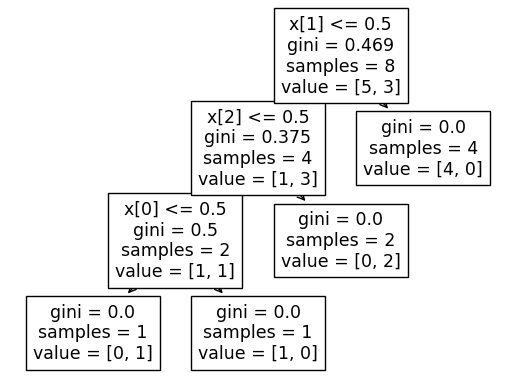

In [20]:
from sklearn import tree
tree.plot_tree(clf)

In [21]:
df.head(10)

,Outlook,Temperature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


[Text(0.6666666666666666, 0.875, 'x[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

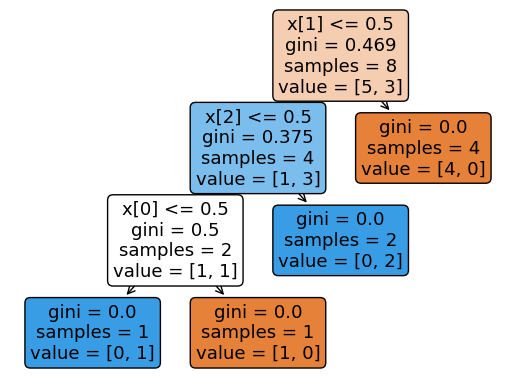

In [22]:
tree.plot_tree(clf, filled=True, rounded=True)

[Text(0.6666666666666666, 0.875, 'Temperature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

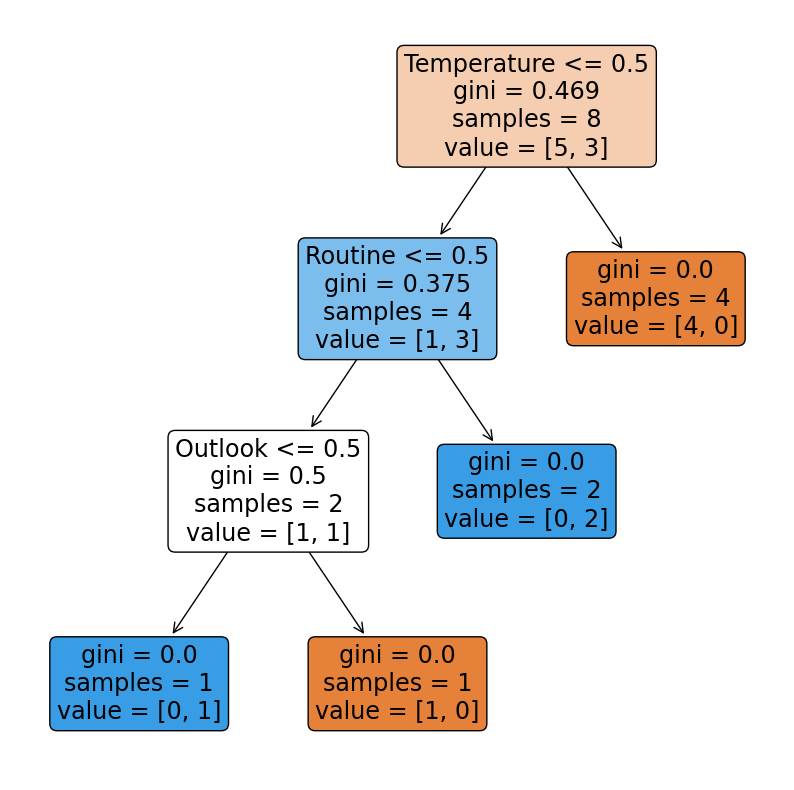

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(clf, filled=True, rounded=True, feature_names=x.columns)

In [28]:
from sklearn import tree
df = pd.read_csv('male_female.csv')
df

,height,weight,shoe size,gender
0,181,80,44,male
1,177,70,43,female
2,160,60,38,female
3,154,54,37,female
4,166,65,40,male
5,190,90,47,male
6,175,64,39,male
7,171,75,42,female
8,185,85,43,female
9,169,71,42,male


In [29]:
x = df.iloc[:,:-1]
x

,height,weight,shoe size
0,181,80,44
1,177,70,43
2,160,60,38
3,154,54,37
4,166,65,40
5,190,90,47
6,175,64,39
7,171,75,42
8,185,85,43
9,169,71,42


In [30]:
y = df.iloc[:,3]
y

0      male
1    female
2    female
3    female
4      male
5      male
6      male
7    female
8    female
9      male
Name: gender, dtype: object

In [31]:
cls_ = tree.DecisionTreeClassifier()

In [32]:
cls_ = cls_.fit(x,y)

In [33]:
prediction_ = cls_.predict([[190,70,43]])

/home/kazi/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [34]:
prediction_

array(['female'], dtype=object)

In [35]:
prediction_ = cls_.predict([[200,79,44]])
prediction_

/home/kazi/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['male'], dtype=object)

In [38]:
import pandas as pd
sp = pd.read_csv('shop_data.csv')
sp

,age,income,gender,m_status,buys
0,<25,high,male,single,no
1,<25,high,male,married,no
2,25-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes
5,>35,low,female,single,no
6,25-35,low,female,married,yes
7,<25,medium,male,married,no
8,<25,low,female,single,yes
9,>35,medium,female,married,yes


In [39]:
x = sp.iloc[:,:-1]
x

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single
4,>35,low,female,single
5,>35,low,female,single
6,25-35,low,female,married
7,<25,medium,male,married
8,<25,low,female,single
9,>35,medium,female,married


In [41]:
y = sp.iloc[:,4]
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
14     no
Name: buys, dtype: object

# Data prepossessing

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
Le_x = LabelEncoder()

In [44]:
x = x.apply(LabelEncoder().fit_transform)
x

,age,income,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,1
6,0,1,0,0
7,1,2,1,0
8,1,1,0,1
9,2,2,0,0


In [46]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [47]:
sp_dtf = DecisionTreeClassifier()

In [48]:
sp_dtf.fit(x.iloc[:,0:4], y)

DecisionTreeClassifier()

In [49]:
xinput = np.array([1,1,0,0])

In [51]:
y_predict = sp_dtf.predict([xinput])
y_predict

/home/kazi/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['yes'], dtype=object)

# Cross validation 

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create an instance of DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Perform cross-validation with 5 folds
scores = cross_val_score(dtc, X, y, cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores:", scores)

# Calculate the mean accuracy across all folds
mean_accuracy = scores.mean()
print("Mean accuracy:", mean_accuracy)

Accuracy scores: [0.96666667 0.96666667 0.9        0.96666667 1.        ]
Mean accuracy: 0.9600000000000002
